<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MapDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_MapDB.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_MapDB.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_MapDB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_MapDB.csv")

In [4]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model =  RandomForestClassifier(n_estimators=60, max_depth= 15, max_leaf_nodes=70, random_state = 50)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

svm_model =  SVC()
svm_model.fit(train_features, train_target.values.ravel())
svm_model_test_prediction_df = pd.DataFrame ({'svm': svm_model.predict(test_features)})
svm_model_train_prediction_df = pd.DataFrame ({'svm': svm_model.predict(train_features)})

GaussianNB_model =  GaussianNB()
GaussianNB_model.fit(train_features, train_target.values.ravel())
GaussianNB_model_test_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(test_features)})
GaussianNB_model_train_prediction_df = pd.DataFrame ({'GaussianNB': GaussianNB_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df, svm_model_test_prediction_df, GaussianNB_model_test_prediction_df, GaussianNB_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df, randomForest_model_train_prediction_df, svm_model_train_prediction_df, GaussianNB_model_train_prediction_df], axis=1)

32/32 [==============================] - 0s 2ms/step


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
2/2 [==============================] - 7s 1s/step - loss: 1.0985 - accuracy: 0.2236 - val_loss: 1.1014 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 130ms/step - loss: 1.0978 - accuracy: 0.4171 - val_loss: 1.1042 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 160ms/step - loss: 1.0971 - accuracy: 0.4171 - val_loss: 1.1071 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 160ms/step - loss: 1.0964 - accuracy: 0.4171 - val_loss: 1.1099 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 173ms/step - loss: 1.0957 - accuracy: 0.4171 - val_loss: 1.1128 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 0s 168ms/step - loss: 1.0950 - accuracy: 0.4171 - val_loss: 1.1158 - val_accuracy: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 136ms/step - loss: 1.0943 - accuracy: 0.4171 - val_loss: 1.1190 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 1s/step - loss: 0.5478 - accuracy: 0.8053 - val_loss: 0.2912 - val_accuracy: 0.9950
Epoch 101/1000
2/2 [==============================] - 0s 336ms/step - loss: 0.5482 - accuracy: 0.8053 - val_loss: 0.3116 - val_accuracy: 0.9950
Epoch 102/1000
2/2 [==============================] - 0s 244ms/step - loss: 0.5468 - accuracy: 0.8053 - val_loss: 0.3356 - val_accuracy: 0.9950
Epoch 103/1000
2/2 [==============================] - 0s 251ms/step - loss: 0.5466 - accuracy: 0.8053 - val_loss: 0.3396 - val_accuracy: 0.9950
Epoch 104/1000
2/2 [==============================] - 0s 269ms/step - loss: 0.5473 - accuracy: 0.8053 - val_loss: 0.3227 - val_accuracy: 0.9950
Epoch 105/1000
2/2 [==============================] - 0s 279ms/step - loss: 0.5450 - accuracy: 0.8053 - val_loss: 0.3000 - val_accuracy: 0.9950
Epoch 106/1000
2/2 [==============================] - 0s 274ms/step - loss: 0.5481 - accuracy: 0.8053 - val_loss: 0.2955 - val_accuracy: 0.9950
Epoch 107/

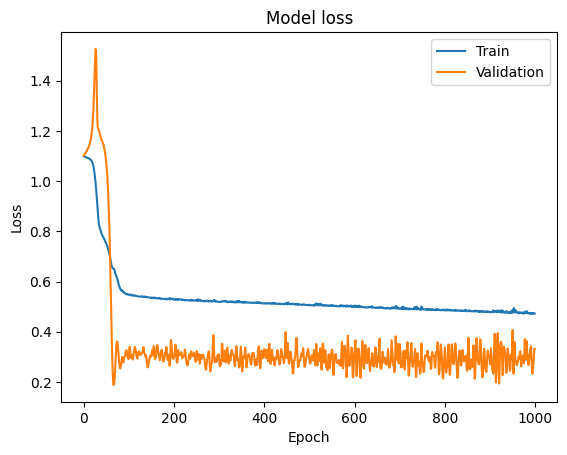



*********************************************




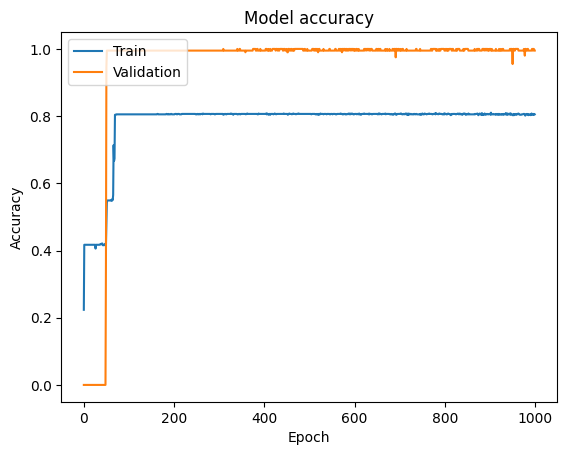



*********************************************
Test-set evaluate result:

5/5 [==============================] - 0s 4ms/step - loss: 1.7977 - accuracy: 0.4379
[1.7977267503738403, 0.43790850043296814]
5/5 [==============================] - 0s 3ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.68      0.48      0.56        84
     class 1       0.30      0.43      0.35        47
     class 2       0.25      0.32      0.28        22

    accuracy                           0.44       153
   macro avg       0.41      0.41      0.40       153
weighted avg       0.50      0.44      0.46       153



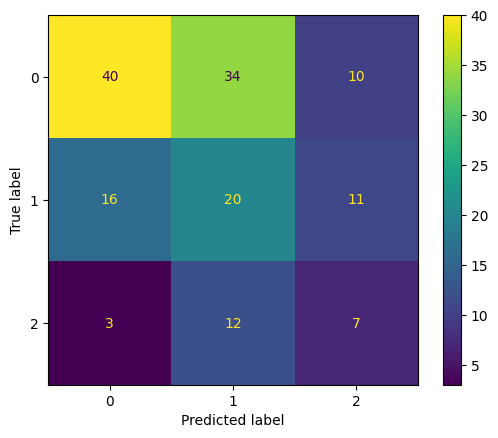



*********************************************
Train-set evaluate result:

32/32 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8434
[0.44548431038856506, 0.8433734774589539]
32/32 [==============================] - 0s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.87      0.71      0.78       332
     class 1       0.78      0.83      0.81       332
     class 2       0.88      0.99      0.93       332

    accuracy                           0.84       996
   macro avg       0.85      0.84      0.84       996
weighted avg       0.85      0.84      0.84       996



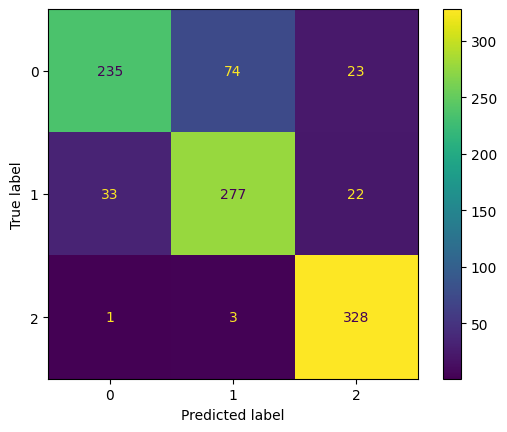

In [7]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
1/1 [==============================] - 0s 147ms/step - loss: 0.4740 - accuracy: 0.8053 - val_loss: 0.3000 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.4716 - accuracy: 0.8065 - val_loss: 0.2703 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.4716 - accuracy: 0.8040 - val_loss: 0.2542 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.4733 - accuracy: 0.8040 - val_loss: 0.2507 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.4732 - accuracy: 0.8040 - val_loss: 0.2580 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.4713 - accuracy: 0.8040 - val_loss: 0.2734 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.4708 - accuracy: 0.8028 - val_loss: 0.2887 - val_accuracy: 1.0000
Epoch 8/1000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 66ms/step - loss: 0.4634 - accuracy: 0.8040 - val_loss: 0.2921 - val_accuracy: 1.0000
Epoch 104/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4634 - accuracy: 0.8040 - val_loss: 0.2925 - val_accuracy: 1.0000
Epoch 105/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4633 - accuracy: 0.8040 - val_loss: 0.2947 - val_accuracy: 1.0000
Epoch 106/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4632 - accuracy: 0.8040 - val_loss: 0.2913 - val_accuracy: 1.0000
Epoch 107/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4631 - accuracy: 0.8040 - val_loss: 0.2876 - val_accuracy: 1.0000
Epoch 108/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4631 - accuracy: 0.8040 - val_loss: 0.2915 - val_accuracy: 1.0000
Epoch 109/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4629 - accuracy: 0.8040 - val_loss: 0.2940 - val_accuracy: 1.0000
Epoch 110/1000

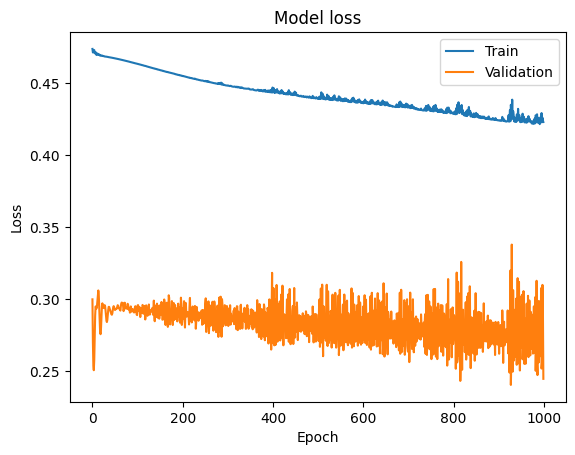



*********************************************




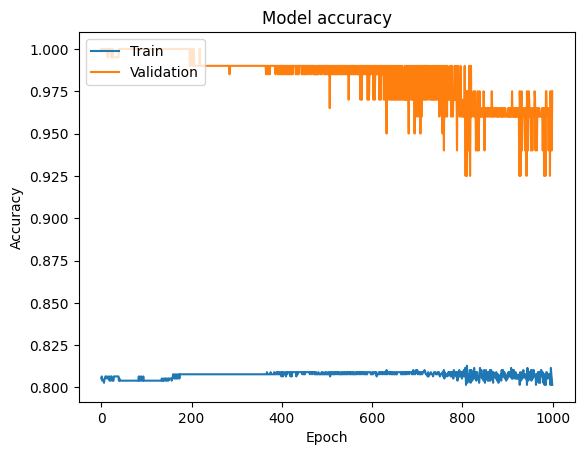



*********************************************
Test-set evaluate result:

5/5 [==============================] - 0s 4ms/step - loss: 3.0658 - accuracy: 0.4641
[3.065849781036377, 0.46405228972435]
5/5 [==============================] - 0s 9ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.70      0.50      0.58        84
     class 1       0.33      0.47      0.39        47
     class 2       0.26      0.32      0.29        22

    accuracy                           0.46       153
   macro avg       0.43      0.43      0.42       153
weighted avg       0.52      0.46      0.48       153



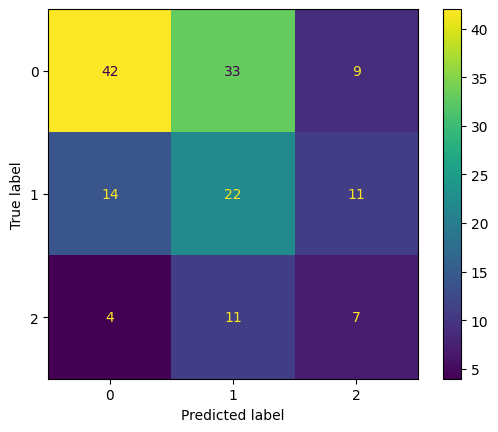



*********************************************
Train-set evaluate result:

32/32 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8424
[0.38889190554618835, 0.8423694968223572]
32/32 [==============================] - 0s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.86      0.71      0.78       332
     class 1       0.77      0.84      0.81       332
     class 2       0.89      0.97      0.93       332

    accuracy                           0.84       996
   macro avg       0.84      0.84      0.84       996
weighted avg       0.84      0.84      0.84       996



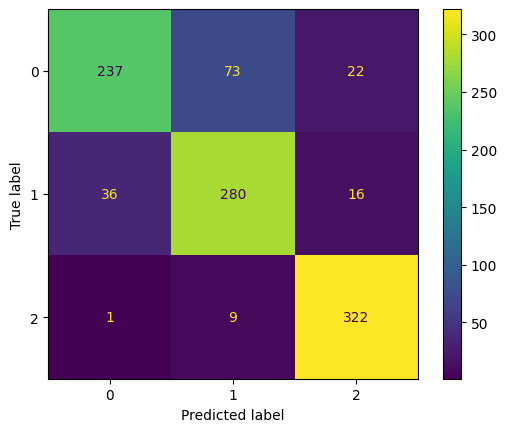

In [8]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Test-set evaluate result:

5/5 [==============================] - 0s 6ms/step - loss: 3.0658 - accuracy: 0.4641
[3.065849781036377, 0.46405228972435]
5/5 [==============================] - 0s 4ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.70      0.50      0.58        84
     class 1       0.33      0.47      0.39        47
     class 2       0.26      0.32      0.29        22

    accuracy                           0.46       153
   macro avg       0.43      0.43      0.42       153
weighted avg       0.52      0.46      0.48       153



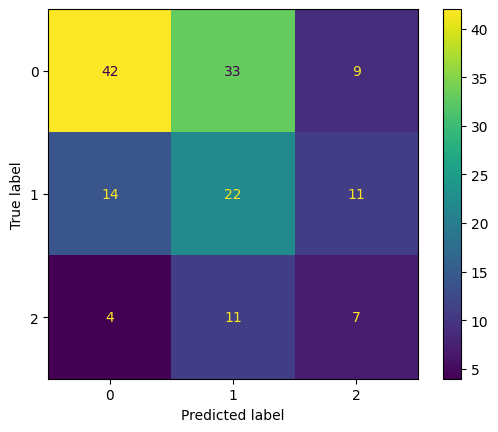



*********************************************
Train-set evaluate result:

32/32 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8424
[0.38889190554618835, 0.8423694968223572]
32/32 [==============================] - 0s 2ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.86      0.71      0.78       332
     class 1       0.77      0.84      0.81       332
     class 2       0.89      0.97      0.93       332

    accuracy                           0.84       996
   macro avg       0.84      0.84      0.84       996
weighted avg       0.84      0.84      0.84       996



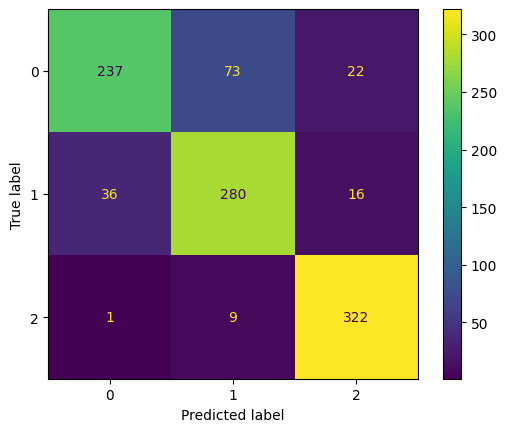

In [10]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()